<a href="https://colab.research.google.com/github/eduarda-mota/analise-dados-python/blob/main/Projeto_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A análise das vendas de jogos do PS4 foi realizada utilizando a base de dados obtida no site Kaggle.

https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset

In [69]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [70]:
# Leitura dos dados
dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

In [71]:
# Dimensão dos dados
dados.shape

(1034, 9)

In [72]:
dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [73]:
# Campos nulos
dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [74]:
# Remoção dos campos nulos
dados.dropna(inplace=True)

In [75]:
# Estatística
dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


**Analisando as vendas globais de jogos de 2013 a 2020**

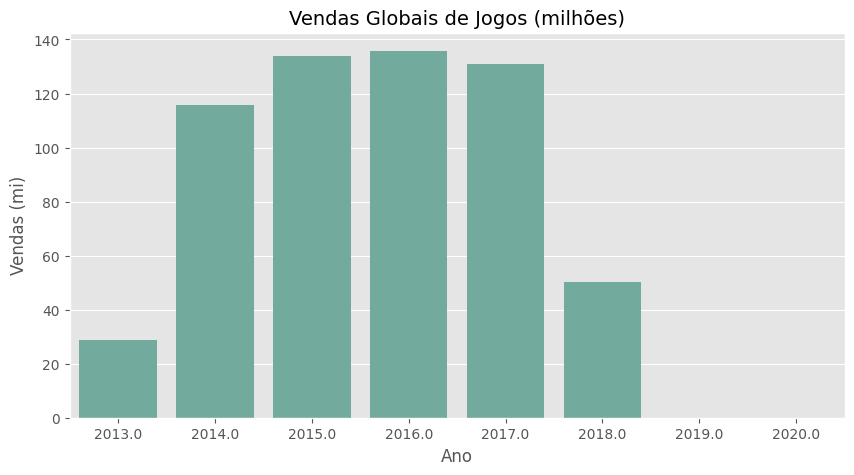

In [76]:
plt.figure(figsize=(10, 5))
plt.title('Vendas Globais de Jogos (milhões)', loc='center', fontsize=14)
sns.barplot(data=dados, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum)
plt.ylabel('Vendas (mi)')
plt.xlabel('Ano');

Houve um aumento significativo das vendas em 2014.

In [77]:
# Remoção dos dois últimos anos
dados = dados.loc[ (dados['Year'] != 2019) & (dados['Year'] != 2020) ]
dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


**Analisando a distribuição das vendas globais**

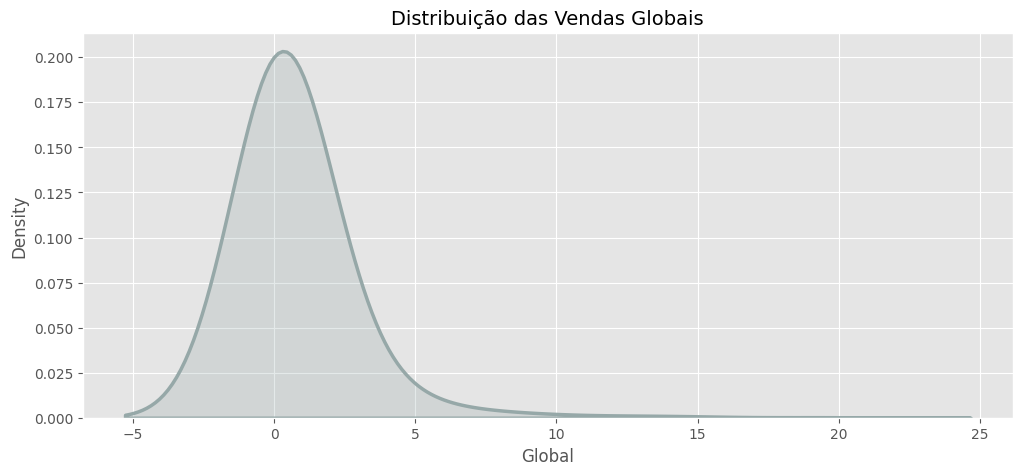

In [78]:
# Gráfico de Densidade
plt.figure(figsize=(12, 5))
plt.style.use('ggplot')
plt.title('Distribuição das Vendas Globais', loc='center', fontsize=14)
sns.kdeplot(dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5);

**Analisando as vendas globais de 2013 a 2018 por meio do Boxplot**

In [79]:
# Agrupando as vendas por ano
dados.groupby( by=['Year'] ).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


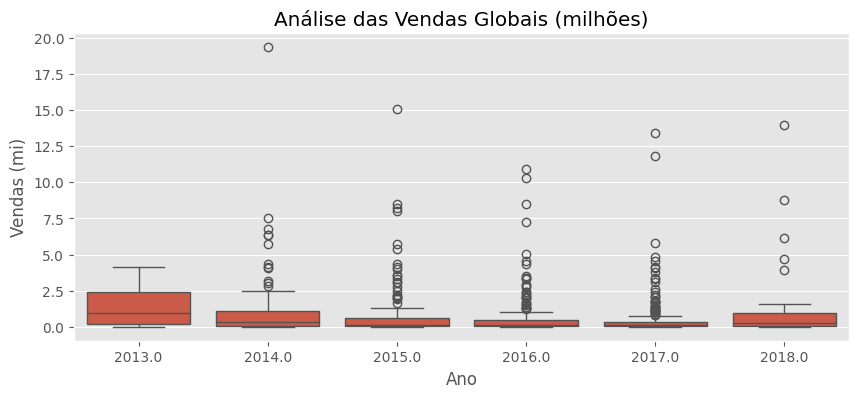

In [80]:
# Boxplot
plt.figure(figsize=(10, 4))
plt.title('Análise das Vendas Globais (milhões)')
sns.boxplot(data=dados, x='Year', y='Global')
plt.ylabel('Vendas (mi)')
plt.xlabel('Ano');

Com o gráfico acima, percebe-se que alguns jogos são muito mais vendidos que outros, sendo eles representados pelos outliers.

**Jogos mais vendidos durante esses anos**

In [81]:
dados.loc[dados['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


**Analisando a porcentagem correspondente a cada continente em relação ao total de vendas**

In [82]:
analise = dados.groupby(by=['Year']).sum().reset_index()
analise

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


In [83]:
# Calculando a porcentagem correspondente a cada continente em relação ao total de vendas (em cada ano)

america = [america / total * 100 for america, total in zip(analise['North America'], analise['Global'])]
europa = [europa / total * 100 for europa, total in zip(analise['Europe'], analise['Global'])]
japao = [japao / total * 100 for japao, total in zip(analise['Japan'], analise['Global'])]
mundo = [mundo / total * 100 for mundo, total in zip(analise['Rest of World'],analise['Global'])]

america, europa, japao, mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

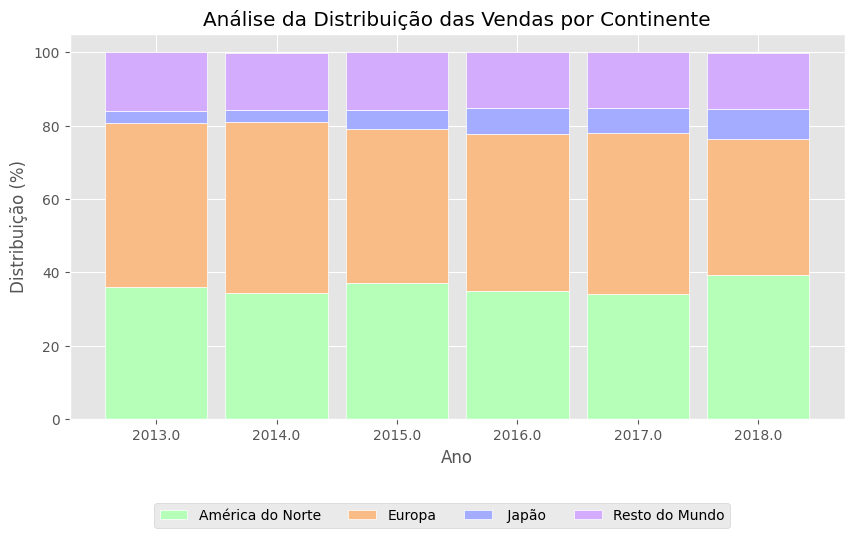

In [84]:
# Gráfico da Distribuição das Vendas por Continente

plt.figure(figsize=(10, 5))
largura_barra = 0.85
rotulos = analise['Year']
grupos = [0, 1, 2, 3, 4, 5]

plt.title('Análise da Distribuição das Vendas por Continente')

# Plot da América
plt.bar(grupos, america, width=largura_barra, color='#b5ffb9', edgecolor='white')

# Plot da Europa
plt.bar(grupos, europa, bottom=america, width=largura_barra, color='#f9bc86', edgecolor='white')

# Plot do Japão
plt.bar(grupos, japao, bottom=[ A + B for A, B in zip(america, europa) ], width=largura_barra, color='#a3acff', edgecolor='white')

# Plot do Resto do Mundo
plt.bar(grupos, mundo, bottom=[ A + B + C for A, B, C in zip(america, europa, japao) ], width=largura_barra, color='#d3acfe', edgecolor='white')

plt.xticks(grupos, rotulos)
plt.xlabel('Ano')
plt.ylabel('Distribuição (%)')
plt.legend( ['América do Norte', 'Europa',' Japão', 'Resto do Mundo'], loc='upper left', bbox_to_anchor=(0.10, -0.2), ncol=4);

Percebe-se que o maiores mercados de jogos são a América do Norte e a Europa.

In [85]:
# Valores únicos da coluna Publisher
dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [86]:
# Conversão de texto para valor numérico / É atribuído um valor numérico para cada valor único

from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

dados['Produtora'] = Funcao_Label.fit_transform(dados['Publisher'])
dados['Gênero'] = Funcao_Label.fit_transform(dados['Genre'])
dados['Jogo'] = Funcao_Label.fit_transform(dados['Game'])

dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtora,Gênero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [87]:
# Paleta com 8 cores (lista)
paleta_cores = sns.color_palette('husl', 8)
paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

**Analisando as vendas globais de cada produtora de jogos**

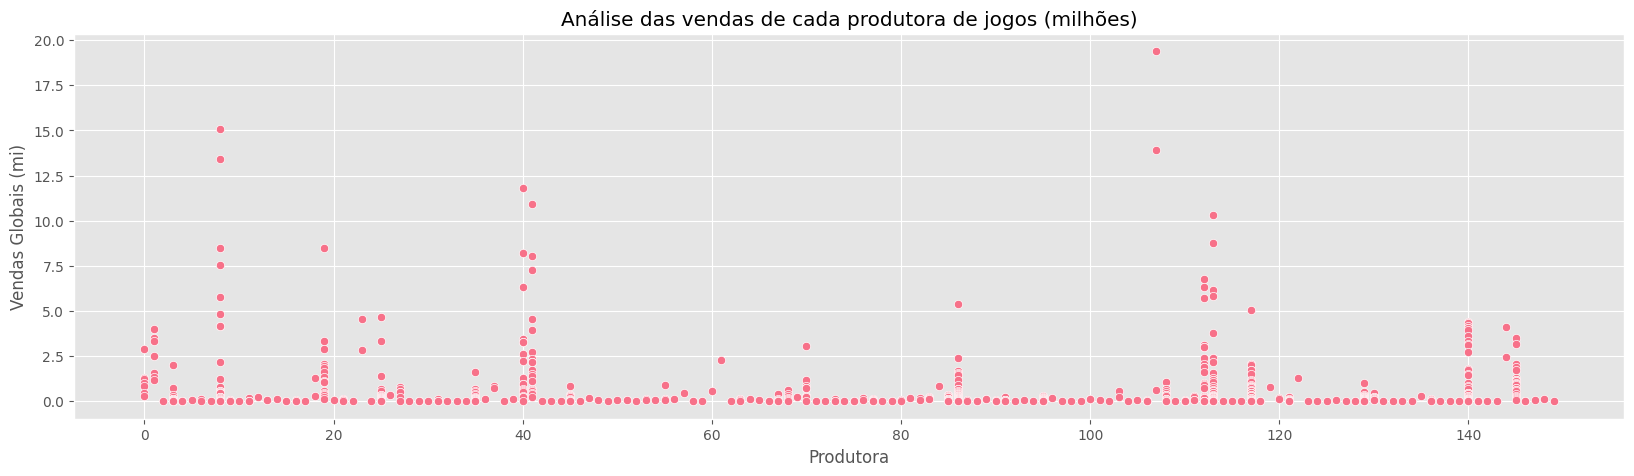

In [88]:
plt.figure(figsize=(20,5))
plt.title('Análise das vendas de cada produtora de jogos (milhões)')
sns.scatterplot(data=dados, x='Produtora', y='Global', color=paleta_cores[0])
plt.xlabel('Produtora')
plt.ylabel('Vendas Globais (mi)');

**Analisando as vendas globais de acordo com o gênero do jogo**

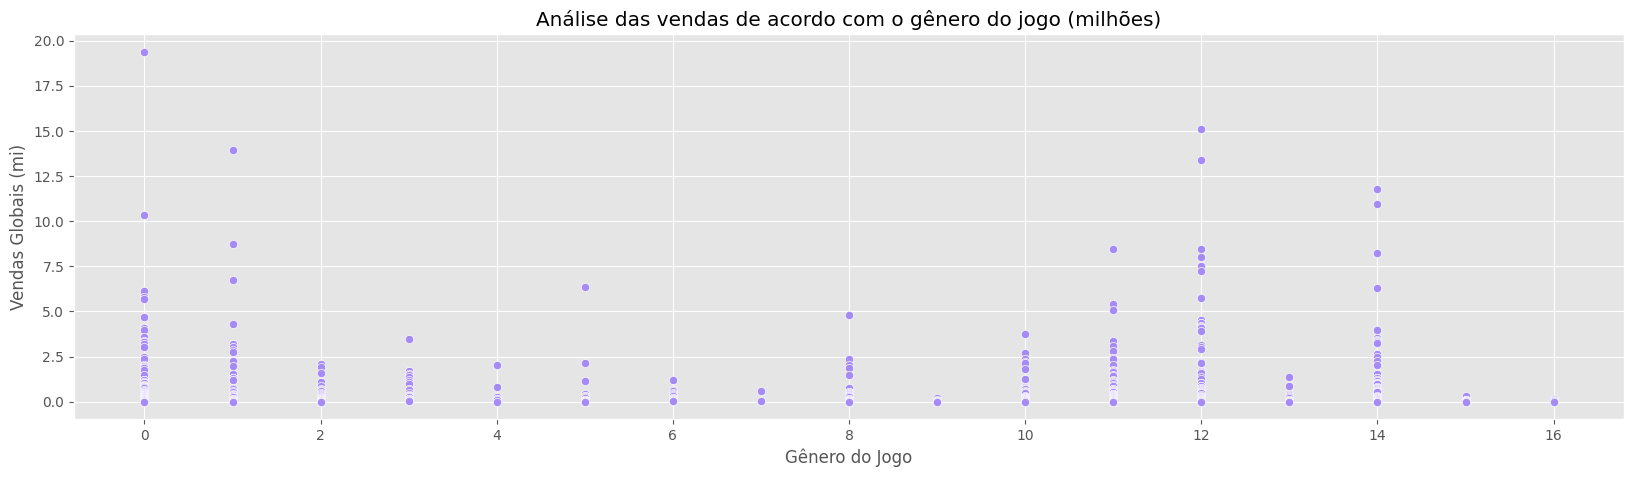

In [89]:
plt.figure(figsize=(20,5))
plt.title('Análise das vendas de acordo com o gênero do jogo (milhões)')
sns.scatterplot(data=dados, x='Gênero', y='Global', color=paleta_cores[6])
plt.xlabel('Gênero do Jogo')
plt.ylabel('Vendas Globais (mi)');

Os gêneros mais vendidos são os associados aos números 0, 1, 12 e 14.

**Analisando as vendas globais de cada jogo produzido**

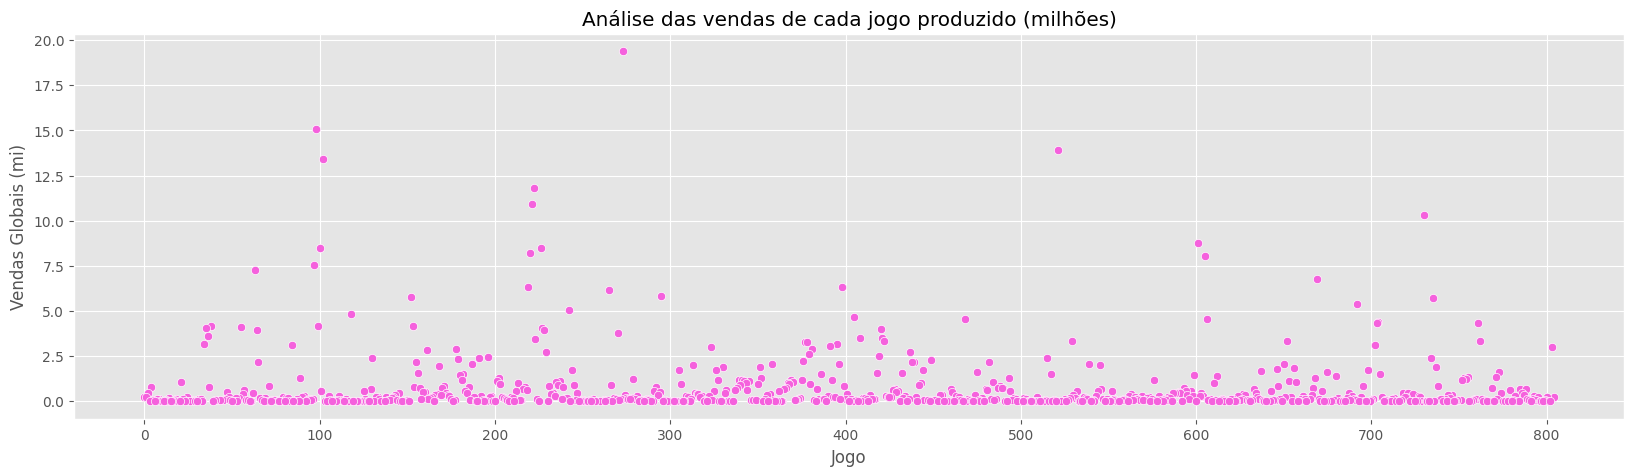

In [90]:
plt.figure(figsize=(20,5))
plt.title('Análise das vendas de cada jogo produzido (milhões)')
sns.scatterplot(data=dados, x='Jogo', y='Global', color=paleta_cores[7])
plt.xlabel('Jogo')
plt.ylabel('Vendas Globais (mi)');